In [1]:
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# Reduce df to a few important columns
df = pd.read_csv("repd-october-2022.csv", encoding='"ISO-8859-1"')
reduced_df = df[['Ref ID', 'Site Name', 'Technology Type', 'Under Construction', 'Operational','Development Status',
                'Country', 'Post Code', 'X-coordinate', 'Y-coordinate', 'Installed Capacity (MWelec)']]

# Drop any sites not currently operational
reduced_df = reduced_df[(reduced_df['Development Status'] == 'Operational')]

# Date time formating on operational column
reduced_df['Operational'] = pd.to_datetime(reduced_df['Operational'], dayfirst=True, infer_datetime_format=True, errors='ignore')
reduced_df['Under Construction'] = pd.to_datetime(reduced_df['Under Construction'], dayfirst=True, infer_datetime_format=True, errors='ignore')

# Drop any sites with unknown energy output
reduced_df = reduced_df.dropna(subset = ['Installed Capacity (MWelec)'])

<AxesSubplot:xlabel='Operational', ylabel='Installed Capacity (MWelec)'>

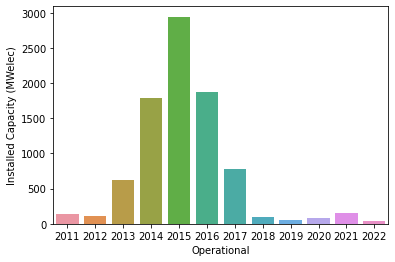

In [27]:
# Solar

solar_df = reduced_df[reduced_df['Technology Type'].str.contains('Solar Photovoltaics')]
solar_year_capacity = solar_df.groupby(pd.Grouper(key='Operational', axis=0, freq='Y')).sum()

x_dates = solar_year_capacity.index.strftime('%Y')

sns.barplot(x=x_dates, y=solar_year_capacity['Installed Capacity (MWelec)'])



In [12]:
# 2015
solar_df = solar_df.set_index(solar_df['Operational']).sort_index()
#solar_df.loc['2015-01-01' : '2016-01-01']['Installed Capacity (MWelec)']


In [13]:
solar_df['Operational']

Operational
2011-06-24   2011-06-24
2011-07-01   2011-07-01
2011-07-01   2011-07-01
2011-07-01   2011-07-01
2011-07-01   2011-07-01
                ...    
NaT                 NaT
NaT                 NaT
NaT                 NaT
NaT                 NaT
NaT                 NaT
Name: Operational, Length: 1239, dtype: datetime64[ns]

In [20]:
# Reduce df to a few important columns
df = pd.read_csv("repd-october-2022.csv", encoding='"ISO-8859-1"')
reduced_df2 = df[['Ref ID', 'Site Name', 'Technology Type', 'Under Construction', 'Operational','Development Status',
                'Country', 'Post Code', 'X-coordinate', 'Y-coordinate', 'Installed Capacity (MWelec)']]

reduced_df2['Under Construction'] = pd.to_datetime(reduced_df2['Under Construction'], dayfirst=True, infer_datetime_format=True, errors='ignore')

reduced_df2= reduced_df2[reduced_df2['Development Status'] == 'Under Construction']

solar_construction_df = reduced_df2[reduced_df2['Technology Type'].str.contains('Solar Photovoltaics')]


C:\Users\AidanLaptop\AppData\Local\Temp\ipykernel_5960\3928062436.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_df2['Under Construction'] = pd.to_datetime(reduced_df2['Under Construction'], dayfirst=True, infer_datetime_format=True, errors='ignore')


In [25]:
reduced_df2['Under Construction']

87     2015-11-17
128    2016-08-01
267    2016-05-01
315    2016-04-11
435    2021-05-01
          ...    
7756   2022-08-08
7757   2022-04-01
7771   2022-08-01
7833   2022-09-01
7880   2020-07-01
Name: Under Construction, Length: 221, dtype: datetime64[ns]

<AxesSubplot:xlabel='Under Construction', ylabel='Installed Capacity (MWelec)'>

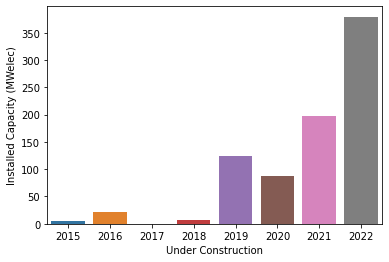

In [28]:
solar_construction_year_capacity = solar_construction_df.groupby(pd.Grouper(key='Under Construction', axis=0, freq='Y')).sum()

x_dates = solar_construction_year_capacity.index.strftime('%Y')

sns.barplot(x=x_dates, y=solar_construction_year_capacity['Installed Capacity (MWelec)'])

In [ ]:
solar_construction_df['Under Construction']

In [ ]:
solar_df